In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import cv2
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, layers, models

In [2]:
!pip install -q kaggle

In [3]:
os.environ['KAGGLE_CONFIG_DIR']='/content'

In [4]:
!kaggle datasets download -d asdasdasasdas/garbage-classification

 98% 80.0M/82.0M [00:05<00:00, 22.4MB/s]
100% 82.0M/82.0M [00:05<00:00, 15.7MB/s]


In [5]:
!unzip garbage-classification.zip -d garbage-classification

Streaming output truncated to the last 5000 lines.
  inflating: garbage-classification/Garbage classification/Garbage classification/cardboard/cardboard152.jpg  
  inflating: garbage-classification/Garbage classification/Garbage classification/cardboard/cardboard153.jpg  
  inflating: garbage-classification/Garbage classification/Garbage classification/cardboard/cardboard154.jpg  
  inflating: garbage-classification/Garbage classification/Garbage classification/cardboard/cardboard155.jpg  
  inflating: garbage-classification/Garbage classification/Garbage classification/cardboard/cardboard156.jpg  
  inflating: garbage-classification/Garbage classification/Garbage classification/cardboard/cardboard157.jpg  
  inflating: garbage-classification/Garbage classification/Garbage classification/cardboard/cardboard158.jpg  
  inflating: garbage-classification/Garbage classification/Garbage classification/cardboard/cardboard159.jpg  
  inflating: garbage-classification/Garbage classification/Ga

In [6]:
d="/content/garbage-classification/Garbage classification/Garbage classification"

In [7]:
classes=["cardboard","glass","metal","paper","plastic","trash"]

In [8]:
data=[]
for c in classes:
    i=classes.index(c)
    path=os.path.join(d,c)
    for img in os.listdir(path):
        im=cv2.imread(os.path.join(path,img))
        im=cv2.resize(im,(224,224))
        data.append([im,i])

In [9]:
data=np.array(data)
import random
random.shuffle(data)

<ipython-input-9-eb3a6eb15208>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data=np.array(data)


In [10]:
X=[]
Y=[]
for x,y in data:
    X.append(x)
    Y.append(y)

In [11]:
x=np.array(X)
y=np.array(Y)
print(x.shape,y.shape)

(2527, 224, 224, 3) (2527,)


In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=4, stratify=y)

In [13]:
X_train = x_train / 255.0
X_test = x_test / 255.0

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(1516, 224, 224, 3) (1516,)
(1011, 224, 224, 3) (1011,)


1.Build MobileNetV2 Model

In [14]:
model_mobileNet=tf.keras.applications.mobilenet_v2.MobileNetV2(
    input_shape=None,
    alpha=1.0,
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    pooling=None,
    classes=1000,
    classifier_activation='softmax'
)

14536120/14536120 [==============================] - 2s 0us/step


In [15]:
model_mobileNet.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [16]:
base_input1=model_mobileNet.layers[0].input
base_output1=model_mobileNet.layers[-2].output

In [17]:
final_output1 = layers.Dense(128)(base_output1) 
final_output1 = layers.Activation('relu')(final_output1) 
final_output1 = layers.Dense(64)(final_output1)
final_output1 = layers.Activation('relu')(final_output1)
final_output1 = layers.Dense(7, activation='softmax')(final_output1) 

In [18]:
new_model_mobileNet = tf.keras.Model(inputs = base_input1, outputs = final_output1)

In [19]:
new_model_mobileNet.compile(loss="sparse_categorical_crossentropy", optimizer = "SGD", metrics = ["accuracy"])

Train MobileNetV2 Model

In [60]:
history=new_model_mobileNet.fit(x_train, y_train, epochs = 20,validation_data=(x_test, y_test))

Epoch 1/20
48/48 [==============================] - 7s 153ms/step - loss: 0.0096 - accuracy: 0.9960 - val_loss: 0.2475 - val_accuracy: 0.9436
Epoch 2/20
48/48 [==============================] - 7s 148ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.2445 - val_accuracy: 0.9347
Epoch 3/20
48/48 [==============================] - 7s 152ms/step - loss: 0.0080 - accuracy: 0.9987 - val_loss: 0.2715 - val_accuracy: 0.9347
Epoch 4/20
48/48 [==============================] - 8s 165ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.2523 - val_accuracy: 0.9337
Epoch 5/20
48/48 [==============================] - 7s 146ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.2419 - val_accuracy: 0.9387
Epoch 6/20
48/48 [==============================] - 7s 144ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.2453 - val_accuracy: 0.9377
Epoch 7/20
48/48 [==============================] - 7s 146ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.2436 - val_accuracy: 0.9407
Epoch 

In [61]:
new_model_mobileNet.evaluate(x_test,y_test)

32/32 [==============================] - 1s 37ms/step - loss: 0.1926 - accuracy: 0.9545


[0.19263659417629242, 0.9545004963874817]

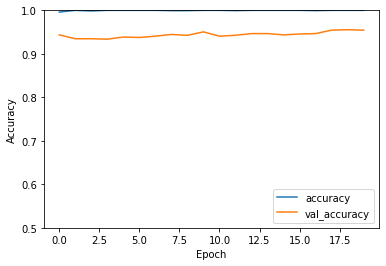

In [62]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

2.Build ResNet50V2 Model

In [23]:
model_resNet50V2=tf.keras.applications.resnet_v2.ResNet50V2(
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation='softmax'
)

102869336/102869336 [==============================] - 6s 0us/step


In [24]:
model_resNet50V2.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                         

In [25]:
base_input2=model_resNet50V2.layers[0].input
base_output2=model_resNet50V2.layers[-2].output

In [26]:
final_output2 = layers.Dense(240)(base_output2) 
final_output2 = layers.Activation('relu')(final_output2) 
final_output2 = layers.Dense(128)(final_output2)
final_output2 = layers.Activation('relu')(final_output2)
final_output2 = layers.Dense(64)(final_output2)
final_output2 = layers.Activation('relu')(final_output2)
final_output2 = layers.Dense(7, activation='softmax')(final_output2) 

In [27]:
new_model_resNet50V2 = tf.keras.Model(inputs = base_input2, outputs = final_output2)

In [28]:
new_model_resNet50V2.compile(loss="sparse_categorical_crossentropy", optimizer = "SGD", metrics = ["accuracy"])

Train RseNet50V2 Model

In [29]:
result=new_model_resNet50V2.fit(x_train, y_train, epochs = 20,validation_data=(x_test, y_test))

Epoch 1/20
48/48 [==============================] - 33s 403ms/step - loss: 1.1433 - accuracy: 0.6438 - val_loss: 1.1913 - val_accuracy: 0.5490
Epoch 2/20
48/48 [==============================] - 16s 326ms/step - loss: 0.4226 - accuracy: 0.8747 - val_loss: 0.7024 - val_accuracy: 0.7666
Epoch 3/20
48/48 [==============================] - 18s 377ms/step - loss: 0.2006 - accuracy: 0.9505 - val_loss: 0.3851 - val_accuracy: 0.8863
Epoch 4/20
48/48 [==============================] - 18s 373ms/step - loss: 0.1012 - accuracy: 0.9743 - val_loss: 0.2835 - val_accuracy: 0.9110
Epoch 5/20
48/48 [==============================] - 18s 377ms/step - loss: 0.0597 - accuracy: 0.9914 - val_loss: 0.2621 - val_accuracy: 0.9139
Epoch 6/20
48/48 [==============================] - 18s 374ms/step - loss: 0.0352 - accuracy: 0.9960 - val_loss: 0.2669 - val_accuracy: 0.9130
Epoch 7/20
48/48 [==============================] - 15s 322ms/step - loss: 0.0304 - accuracy: 0.9954 - val_loss: 0.2504 - val_accuracy: 0.9209

In [30]:
new_model_resNet50V2.evaluate(x_test,y_test)

32/32 [==============================] - 3s 86ms/step - loss: 0.2499 - accuracy: 0.9258


[0.24992750585079193, 0.925815999507904]

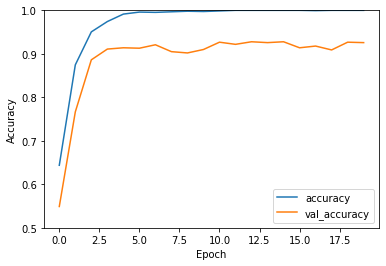

In [31]:
plt.plot(result.history['accuracy'], label='accuracy')
plt.plot(result.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

3.Build DenseNet169 Model

In [32]:
model_denseNet169=tf.keras.applications.densenet.DenseNet169(
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation='softmax'
)

58541896/58541896 [==============================] - 4s 0us/step


In [33]:
model_denseNet169.summary()

Model: "densenet169"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_3[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                        

In [34]:
base_input3=model_denseNet169.layers[0].input
base_output3=model_denseNet169.layers[-2].output

In [35]:
final_output3 = layers.Dense(240)(base_output3) 
final_output3 = layers.Activation('relu')(final_output3) 
final_output3 = layers.Dense(128)(final_output3) 
final_output3 = layers.Activation('relu')(final_output3) 
final_output3 = layers.Dense(64)(final_output3)
final_output3 = layers.Activation('relu')(final_output3)
final_output3 = layers.Dense(7, activation='softmax')(final_output3) 

In [36]:
new_model_denseNet169 = tf.keras.Model(inputs = base_input3, outputs = final_output3)

In [37]:
new_model_denseNet169.compile(loss="sparse_categorical_crossentropy", optimizer = "SGD", metrics = ["accuracy"])

Train DenseNet169 Model

In [38]:
result_D=new_model_denseNet169.fit(x_train, y_train, epochs = 20,validation_data=(x_test, y_test))

Epoch 1/20
48/48 [==============================] - 75s 664ms/step - loss: 0.8616 - accuracy: 0.7236 - val_loss: 0.6102 - val_accuracy: 0.7784
Epoch 2/20
48/48 [==============================] - 25s 515ms/step - loss: 0.2957 - accuracy: 0.9307 - val_loss: 0.4634 - val_accuracy: 0.8427
Epoch 3/20
48/48 [==============================] - 23s 480ms/step - loss: 0.1239 - accuracy: 0.9796 - val_loss: 0.2103 - val_accuracy: 0.9436
Epoch 4/20
48/48 [==============================] - 25s 516ms/step - loss: 0.0638 - accuracy: 0.9901 - val_loss: 0.2306 - val_accuracy: 0.9377
Epoch 5/20
48/48 [==============================] - 23s 482ms/step - loss: 0.0413 - accuracy: 0.9960 - val_loss: 0.1561 - val_accuracy: 0.9505
Epoch 6/20
48/48 [==============================] - 25s 515ms/step - loss: 0.0244 - accuracy: 0.9980 - val_loss: 0.1338 - val_accuracy: 0.9555
Epoch 7/20
48/48 [==============================] - 23s 482ms/step - loss: 0.0213 - accuracy: 0.9967 - val_loss: 0.1360 - val_accuracy: 0.9594

In [58]:
new_model_denseNet169.evaluate(x_test,y_test)

32/32 [==============================] - 4s 115ms/step - loss: 0.1476 - accuracy: 0.9614


[0.14755378663539886, 0.9614243507385254]

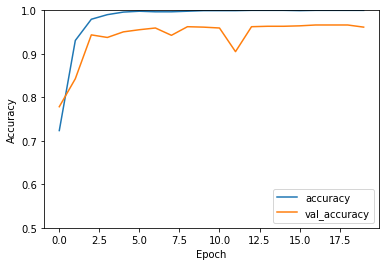

In [40]:
plt.plot(result_D.history['accuracy'], label='accuracy')
plt.plot(result_D.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

4.Build VGG19 Mode

In [41]:
model_vgg19=tf.keras.applications.vgg19.VGG19(
    input_shape=None,
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    pooling=None,
    classes=1000,
    classifier_activation='softmax'
)

574710816/574710816 [==============================] - 27s 0us/step


In [42]:
model_vgg19.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [43]:
base_input4=model_vgg19.layers[0].input
base_output4=model_vgg19.layers[-2].output

In [44]:
final_output4 = layers.Dense(240)(base_output4) 
final_output4 = layers.Activation('relu')(final_output4) 
final_output4 = layers.Dense(128)(final_output4) 
final_output4 = layers.Activation('relu')(final_output4) 
final_output4 = layers.Dense(64)(final_output4)
final_output4 = layers.Activation('relu')(final_output4)
final_output4 = layers.Dense(7, activation='softmax')(final_output4) 

In [45]:
new_model_vgg19 = tf.keras.Model(inputs = base_input4, outputs = final_output4)

In [46]:
new_model_vgg19.compile(loss="sparse_categorical_crossentropy", optimizer = "SGD", metrics = ["accuracy"])

Train VGG19 Model

In [47]:
result_V=new_model_vgg19.fit(x_train, y_train, epochs = 20,validation_data=(x_test, y_test))

Epoch 1/20
48/48 [==============================] - 44s 737ms/step - loss: nan - accuracy: 0.4321 - val_loss: nan - val_accuracy: 0.4471
Epoch 2/20
48/48 [==============================] - 24s 510ms/step - loss: nan - accuracy: 0.4466 - val_loss: nan - val_accuracy: 0.4471
Epoch 3/20
48/48 [==============================] - 26s 534ms/step - loss: nan - accuracy: 0.4466 - val_loss: nan - val_accuracy: 0.4471
Epoch 4/20
48/48 [==============================] - 26s 536ms/step - loss: nan - accuracy: 0.4466 - val_loss: nan - val_accuracy: 0.4471
Epoch 5/20
48/48 [==============================] - 25s 514ms/step - loss: nan - accuracy: 0.4466 - val_loss: nan - val_accuracy: 0.4471
Epoch 6/20
48/48 [==============================] - 25s 512ms/step - loss: nan - accuracy: 0.4466 - val_loss: nan - val_accuracy: 0.4471
Epoch 7/20
48/48 [==============================] - 26s 535ms/step - loss: nan - accuracy: 0.4466 - val_loss: nan - val_accuracy: 0.4471
Epoch 8/20
48/48 [=======================

In [48]:
new_model_vgg19.evaluate(x_test,y_test)

32/32 [==============================] - 4s 130ms/step - loss: nan - accuracy: 0.4471


[nan, 0.4470821022987366]

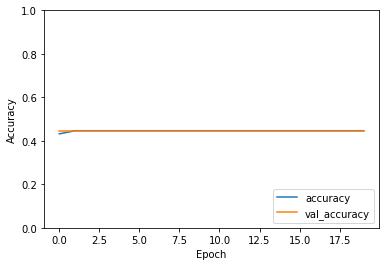

In [64]:
plt.plot(result_V.history['accuracy'], label='accuracy')
plt.plot(result_V.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

Prediction

In [50]:
pred=new_model_mobileNet.predict(x_test)

32/32 [==============================] - 2s 34ms/step


In [51]:
x1=[]
for i in range(len(pred)):
    x1.insert(i,np.argmax(pred[i]))

In [52]:
x1=np.array(x1)
x1

array([0, 0, 0, ..., 0, 1, 0])

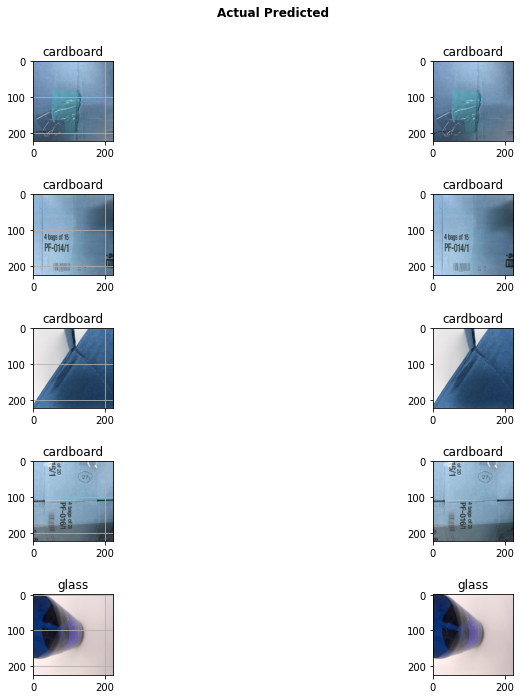

In [53]:
f, ax = plt.subplots(5,2,figsize=(15,10))
f.suptitle('Actual Predicted',fontsize = 12, fontweight ='bold')
a=0
b=1

for i in range(5):
    ax[i,a].imshow(x_test[i])
    ax[i,a].set_title(classes[y_test[i]])
    ax[i,b].imshow(x_test[i])
    ax[i,b].set_title(classes[x1[i]])
    ax[i,a].grid(True)
    ax[i,a].grid(True)


f.tight_layout(pad=2.0)
plt.show()

In [57]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [59]:
new_model_denseNet169.save('/content/drive/MyDrive/SavedModels/denseNet169_Garbage.h5')

In [63]:
new_model_mobileNet.save('/content/drive/MyDrive/SavedModels/mobileNet_Garbage.h5')

In [54]:
# from google.colab.patches import cv2_imshow

In [55]:
# !curl -o logo.png https://colab.research.google.com/img/colab_favicon_256px.png
# import cv2
# img = cv2.imread('logo.png', cv2.IMREAD_UNCHANGED)
# cv2_imshow(img)

In [56]:
# import cv2
  
  
# # define a video capture object
# vid = cv2.VideoCapture(0)
  
# while(True):
      
#     # Capture the video frame
#     # by frame
#     ret, frame = vid.read()
  
#     # Display the resulting frame
#     cv2.imshow('frame', frame)
      
#     # the 'q' button is set as the
#     # quitting button you may use any
#     # desired button of your choice
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break
  
# # After the loop release the cap object
# vid.release()
# # Destroy all the windows
# cv2.destroyAllWindows()